In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-180v6u2x because the default path (/home/user/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [2]:
contact_survey=pd.read_excel('RawData_ComesF.xlsx')

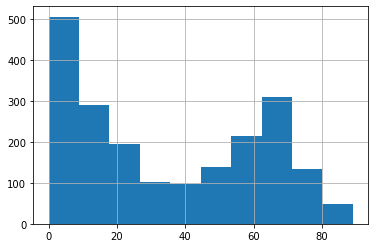

In [3]:
contact_survey['Q1'][2:].hist()
plt.show()

In [4]:
for k in contact_survey.columns:
    print(k)

Vague
numQ
contrôleQ
Type de questionnaire
Q1
Unnamed: 5
Q2
Q3
Q7_1
Q6
Q7nb
Q7_1.1
Q7_2
Q7_3
Q7_4
Q7_5
Q7_6
Q7_7
Q7_8
Q7_9
Q7_10
Q4 sem
Unnamed: 22
Unnamed: 23
Q4 we
Unnamed: 25
Unnamed: 26
Q5
Q8
Q9
Q10
Q11
Q12
Q13
Q13a
Q13b
Q14
Q14a
Q15
Q16
Q17
Q18
Q18a
Q18b
Unnamed: 44
Unnamed: 45
Unnamed: 46
Unnamed: 47
Unnamed: 48
Unnamed: 49
Unnamed: 50
Unnamed: 51
Unnamed: 52
Unnamed: 53
Date1
periode1
Jour1
VAC1
NBcontact1
contact  1
Unnamed: 60
Unnamed: 61
Unnamed: 62
Unnamed: 63
Unnamed: 64
Unnamed: 65
Unnamed: 66
Unnamed: 67
Unnamed: 68
Unnamed: 69
Unnamed: 70
Unnamed: 71
Unnamed: 72
contact  2
Unnamed: 74
Unnamed: 75
Unnamed: 76
Unnamed: 77
Unnamed: 78
Unnamed: 79
Unnamed: 80
Unnamed: 81
Unnamed: 82
Unnamed: 83
Unnamed: 84
Unnamed: 85
Unnamed: 86
contact  3
Unnamed: 88
Unnamed: 89
Unnamed: 90
Unnamed: 91
Unnamed: 92
Unnamed: 93
Unnamed: 94
Unnamed: 95
Unnamed: 96
Unnamed: 97
Unnamed: 98
Unnamed: 99
Unnamed: 100
contact  4
Unnamed: 102
Unnamed: 103
Unnamed: 104
Unnamed: 105
Unnamed: 106
Unnam

In [5]:
mnrc=[]

for u,v in zip([0, 5, 10, 15, 20, 25, 35, 45, 65], [5, 10, 15, 20, 25, 35, 45, 65, 120]):
    # HH
    f=np.asarray((contact_survey['Q1'][2:]>=u)&(contact_survey['Q1'][2:]<v))
    f=contact_survey['Q7nb'][2:][f]-1
    
    #print('{}-{} - {}'.format(u,v, 1*np.round(graph_overall.get_total_degrees(f).mean(), 2)))
    
    mnrc.append(np.round(f.mean(), 2))

mnrc

[3.03, 3.09, 3.01, 2.69, 1.7, 1.31, 1.69, 1.0, 0.74]

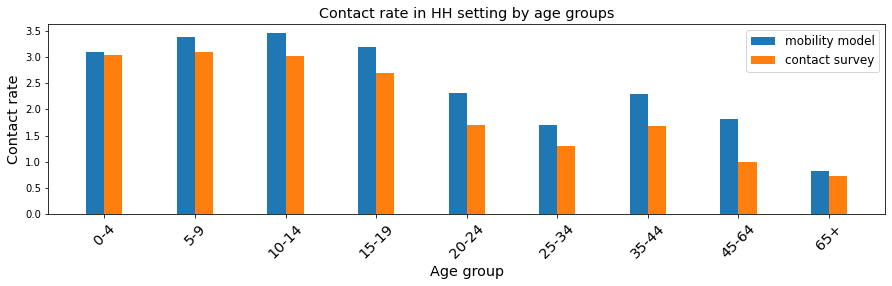

In [45]:
fig, ax=plt.subplots(figsize=(15,3.5))

simulated=np.array([3.09, 3.37, 3.45, 3.19, 2.31, 1.7, 2.3, 1.81, 0.83])
observed=np.array([3.03, 3.09, 3.01, 2.69, 1.7, 1.31, 1.69, 1.0, 0.74])
w=0.2
ax.bar(np.arange(9)-w/2,simulated,w, label='mobility model')
ax.bar(np.arange(9)+w/2,observed,w, label='contact survey')
ax.set_title('Contact rate in HH setting by age groups', fontsize='x-large')
#plt.ylim(0,5)
ax.legend(fontsize='large')
ax.set_xlabel('Age group', fontsize='x-large')
ax.set_ylabel('Contact rate', fontsize='x-large')
ax.set_xticks(np.arange(9))
ax.set_xticklabels(['0-4', '5-9', '10-14', '15-19', '20-24', '25-34', '35-44', '45-64', '65+'], rotation=45, fontsize='x-large')
fig.savefig('files/contact_rate_distribution_inhh_byagegroups.jpg', dpi=400, bbox_inches='tight')
plt.show()

In [21]:
cm=np.hstack((contact_survey['Q1'][2:].values.reshape((-1,1)), contact_survey.iloc[2:, 11:20+1].values))

In [57]:
n=98
ccm=np.zeros((n, n))
list_of_contacts=[]

for k in cm:
    for i in k[1:]:
        if (np.isnan(i)==False) and (k[0]>64):
            ccm[k[0],i]+=1
            list_of_contacts.append((k[0],i))

ccm[ccm == 0] = np.nan

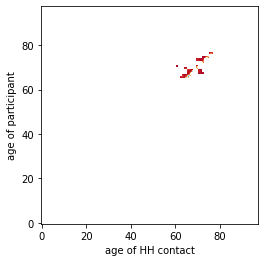

In [56]:
plt.imshow(ccm, cmap='RdYlBu', origin='lower', vmin=0)
#plt.xlim(50, 70)
#plt.ylim(50, 70)
plt.ylabel('age of participant')
plt.xlabel('age of HH contact')
plt.show()

In [24]:
table_of_contacts=np.zeros((2033, 40))

offset=14

for i in range(2033):
    for k in range(40):
        v=contact_survey.iloc[(i+2),(59+2)+k*offset]
        if pd.isna(v):
            table_of_contacts[i,k]=-1
        else:
            table_of_contacts[i,k]=contact_survey.iloc[(i+2),(59+2)+k*offset]

In [29]:
number_of_contacts_all=(table_of_contacts>=0).sum(axis=1)

In [30]:
mnrc=[]

for u,v in zip([0, 5, 10, 15, 20, 25, 35, 45, 65], [5, 10, 15, 20, 25, 35, 45, 65, 120]):
    # non-HH
    f=np.asarray((contact_survey['Q1'][2:]>=u)&(contact_survey['Q1'][2:]<v))
    f=number_of_contacts_all[f]
    
    #print('{}-{} - {}'.format(u,v, 1*np.round(graph_overall.get_total_degrees(f).mean(), 2)))
    
    mnrc.append(np.round(f.mean(), 2))

mnrc

[8.78, 10.21, 12.83, 12.6, 11.6, 9.85, 10.81, 9.86, 7.59]

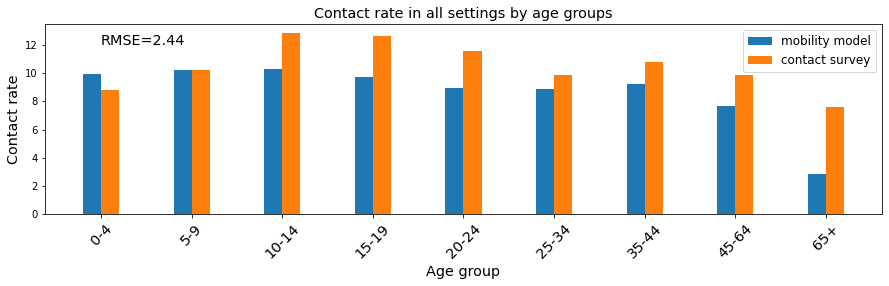

In [61]:
fig, ax=plt.subplots(figsize=(15,3.5))

simulated=np.array([9.97, 10.25, 10.32, 9.70, 8.97, 8.89, 9.21, 7.65, 2.89])
observed=np.array([8.78, 10.21, 12.83, 12.6, 11.6, 9.85, 10.81, 9.86, 7.59])

w=0.2
ax.bar(np.arange(9)-w/2,simulated,w, label='mobility model')
ax.bar(np.arange(9)+w/2,observed,w, label='contact survey')
ax.set_title('Contact rate in all settings by age groups', fontsize='x-large')
#plt.ylim(0,5)
ax.legend(fontsize='large')
ax.set_xlabel('Age group', fontsize='x-large')
ax.set_ylabel('Contact rate', fontsize='x-large')
ax.set_xticks(np.arange(9))
ax.set_xticklabels(['0-4', '5-9', '10-14', '15-19', '20-24', '25-34', '35-44', '45-64', '65+'], rotation=45, fontsize='x-large')
ax.text(0, 12, 'RMSE='+ str(get_rmse(simulated, observed)), fontsize='x-large')
fig.savefig('files/contact_rate_distribution_inall_byagegroups.jpg', dpi=400, bbox_inches='tight')
plt.show()

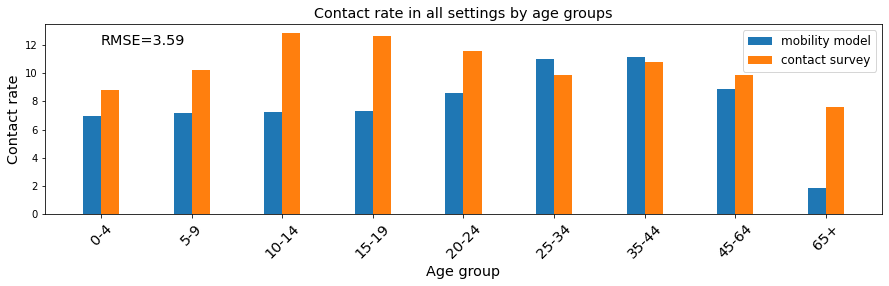

In [62]:
fig, ax=plt.subplots(figsize=(15,3.5))

simulated=np.array([6.98, 7.19, 7.24, 7.32, 8.6, 10.99, 11.11, 8.91, 1.84])
observed=np.array([8.78, 10.21, 12.83, 12.6, 11.6, 9.85, 10.81, 9.86, 7.59])

w=0.2
ax.bar(np.arange(9)-w/2,simulated,w, label='mobility model')
ax.bar(np.arange(9)+w/2,observed,w, label='contact survey')
ax.set_title('Contact rate in all settings by age groups', fontsize='x-large')
#plt.ylim(0,5)
ax.legend(fontsize='large')
ax.set_xlabel('Age group', fontsize='x-large')
ax.set_ylabel('Contact rate', fontsize='x-large')
ax.set_xticks(np.arange(9))
ax.set_xticklabels(['0-4', '5-9', '10-14', '15-19', '20-24', '25-34', '35-44', '45-64', '65+'], rotation=45, fontsize='x-large')
ax.text(0, 12, 'RMSE='+ str(get_rmse(simulated, observed)), fontsize='x-large')
fig.savefig('files/contact_rate_distribution_inall_byagegroups-without.jpg', dpi=400, bbox_inches='tight')
plt.show()

In [58]:
def get_rmse(pred, obs):
    return np.round(np.sqrt(((pred-obs)**2).sum()/len(pred)),2)

In [50]:
get_rmse(simulated, observed)

3.5876563070865326

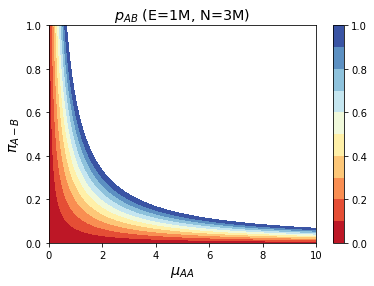

In [88]:
N_A=3000000
E_BB=1000000
mmp=E_BB*2/N_A

mu_AA=np.linspace(0,10, 100)
pi_AB=np.linspace(0,1, 100)

def f(X, Y):
    N_A=3000000
    E_BB=1000000
    return N_A*X*Y/(2*E_BB)
    
X, Y = np.meshgrid(mu_AA, pi_AB)
Z = f(X, Y)


levels = np.arange(11)/10
contours=plt.contourf(X, Y, Z, 20, cmap='RdYlBu', levels=levels)
plt.colorbar()
plt.xlabel('$\mu_{AA}$', fontsize='x-large')
plt.ylabel('$\pi_{A-B}$', fontsize='x-large')
plt.title('$p_{AB}$ (E=1M, N=3M)', fontsize='x-large')

#plt.clabel(contours, inline=True, fontsize=8)

plt.savefig('pAB.jpg', dpi=400, bbox_inches='tight')

In [16]:
contacts_in_work=pd.read_csv('survey/contacts_in_work.csv',';', header=None)

In [53]:
list_of_contacts_per_individuals=[]
cpt=0

NB_BLOCKS=40

for i in range(contacts_in_work.shape[0]):
    for k in range(NB_BLOCKS):
        #print(contacts_in_work.loc[:,k*14:13+k*14].head(10))
        if (contacts_in_work.loc[i,k*14+6]==1) or (contacts_in_work.loc[i,k*14+5]==1):
            #print(contacts_in_work.loc[i,k*14+6])
            cpt+=1
    list_of_contacts_per_individuals.append(cpt)
    cpt=0
            

(array([612.,  36.,  37.,  42.,  47.,  18.,  25.,  19.,  21.,  26.,  13.,
         12.,   8.,  14.,   7.,   4.,   9.,   3.,   4.,   3.,   5.,   6.,
          8.,   1.,   2.,   2.,   1.,   2.,   0.,   2.,   1.,   2.]),
 array([ 0.     ,  1.21875,  2.4375 ,  3.65625,  4.875  ,  6.09375,
         7.3125 ,  8.53125,  9.75   , 10.96875, 12.1875 , 13.40625,
        14.625  , 15.84375, 17.0625 , 18.28125, 19.5    , 20.71875,
        21.9375 , 23.15625, 24.375  , 25.59375, 26.8125 , 28.03125,
        29.25   , 30.46875, 31.6875 , 32.90625, 34.125  , 35.34375,
        36.5625 , 37.78125, 39.     ]),
 <BarContainer object of 32 artists>)

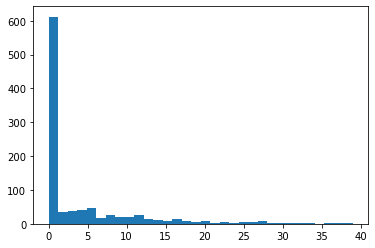

In [55]:
plt.hist(list_of_contacts_per_individuals, 2**5)
np.asarray()